Time Series analysis


In [45]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [46]:
# Load the dataset, specifying the date format
file_path = 'content/Month_Value_1.csv'  
data = pd.read_csv(file_path, parse_dates=['Period'], dayfirst=True)

In [47]:
# Display the first few rows of the dataset
print(data.head())

      Period       Revenue  Sales_quantity  Average_cost  \
0 2015-01-01  1.601007e+07         12729.0   1257.763541   
1 2015-02-01  1.580759e+07         11636.0   1358.507000   
2 2015-03-01  2.204715e+07         15922.0   1384.697024   
3 2015-04-01  1.881458e+07         15227.0   1235.606705   
4 2015-05-01  1.402148e+07          8620.0   1626.621765   

   The_average_annual_payroll_of_the_region  
0                                30024676.0  
1                                30024676.0  
2                                30024676.0  
3                                30024676.0  
4                                30024676.0  


In [48]:
data.shape

(96, 5)

In [49]:
# Cleaning the dataset
# Check for missing values
print("Missing values:")
print(data.isnull().sum())

Missing values:
Period                                       0
Revenue                                     32
Sales_quantity                              32
Average_cost                                32
The_average_annual_payroll_of_the_region    32
dtype: int64


In [50]:
# Check the data types of each column
print("\nData types:")
print(data.dtypes)


Data types:
Period                                      datetime64[ns]
Revenue                                            float64
Sales_quantity                                     float64
Average_cost                                       float64
The_average_annual_payroll_of_the_region           float64
dtype: object


In [51]:
# Set 'Period' as the index
data.set_index('Period', inplace=True)

In [52]:
# Display the cleaned dataset
print("\nCleaned dataset: ")
print(data.head())


Cleaned dataset: 
                 Revenue  Sales_quantity  Average_cost  \
Period                                                   
2015-01-01  1.601007e+07         12729.0   1257.763541   
2015-02-01  1.580759e+07         11636.0   1358.507000   
2015-03-01  2.204715e+07         15922.0   1384.697024   
2015-04-01  1.881458e+07         15227.0   1235.606705   
2015-05-01  1.402148e+07          8620.0   1626.621765   

            The_average_annual_payroll_of_the_region  
Period                                                
2015-01-01                                30024676.0  
2015-02-01                                30024676.0  
2015-03-01                                30024676.0  
2015-04-01                                30024676.0  
2015-05-01                                30024676.0  


In [53]:
# Check the data types of the 'Period' column
print(data.dtypes)


Revenue                                     float64
Sales_quantity                              float64
Average_cost                                float64
The_average_annual_payroll_of_the_region    float64
dtype: object


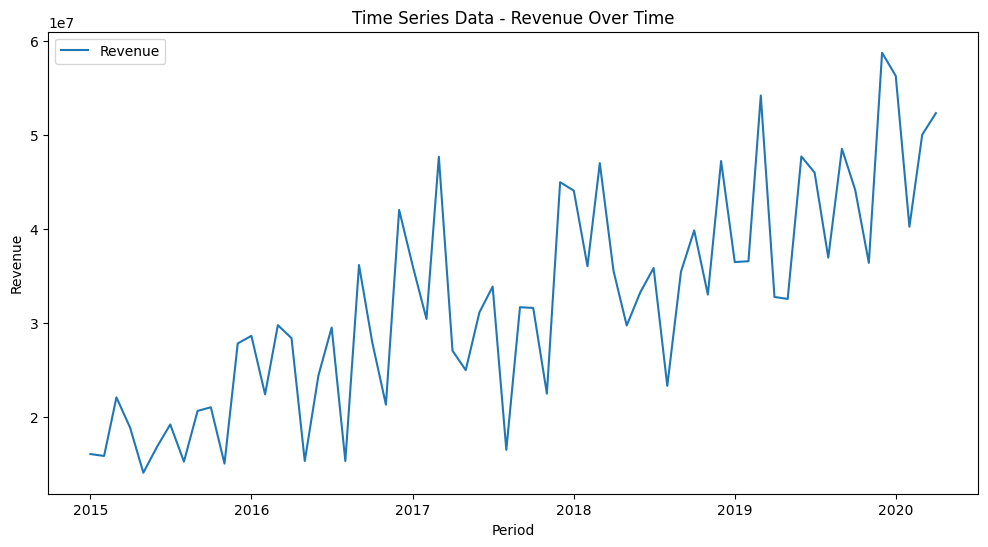

In [54]:
# Visualize the time series data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Revenue'], label='Revenue')
plt.xlabel('Period')
plt.ylabel('Revenue')
plt.title('Time Series Data - Revenue Over Time')
plt.legend()
plt.show()


In [55]:
# Check for missing values again
print("\nMissing values after cleaning:")
print(data.isnull().sum())


Missing values after cleaning:
Revenue                                     32
Sales_quantity                              32
Average_cost                                32
The_average_annual_payroll_of_the_region    32
dtype: int64


approach with a linear regression model for forecasting.


Mean Squared Error: 6369012377808.473


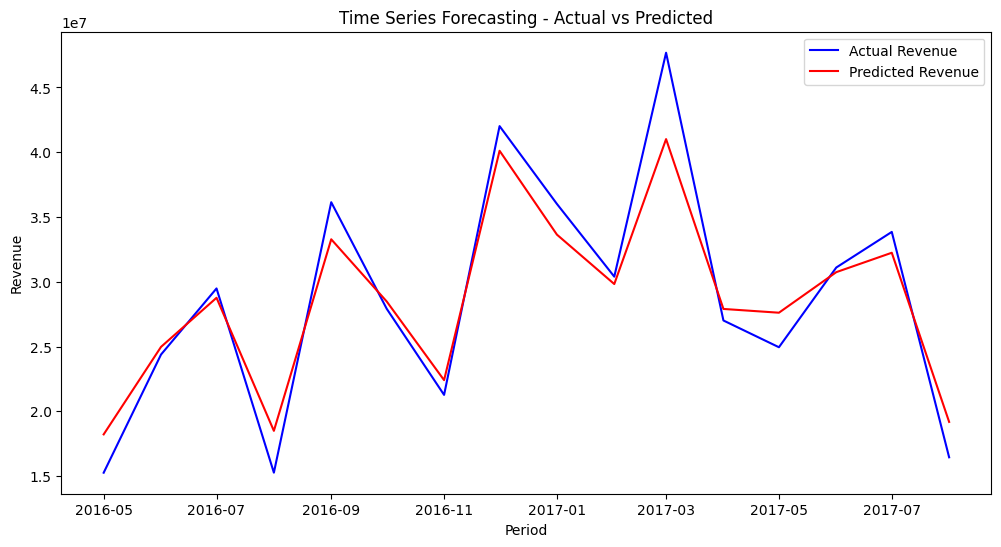


Mean Squared Error: 2403953317227.4478


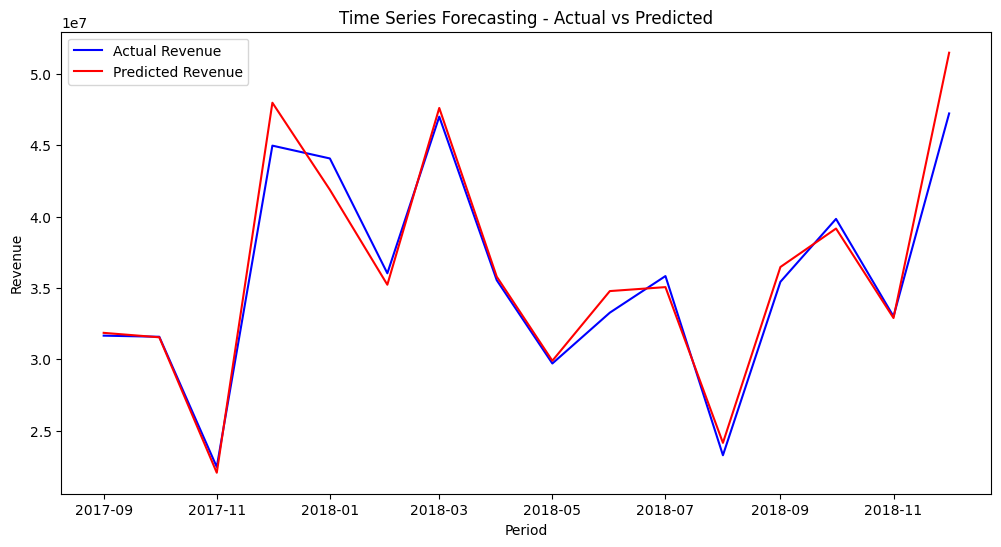


Mean Squared Error: 3908761576347.794


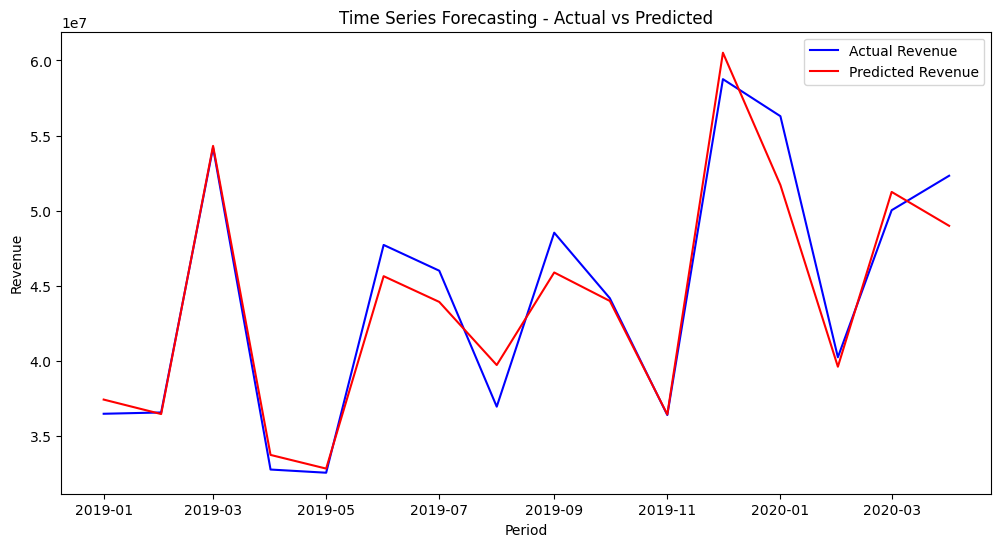

<class 'ValueError'>: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [59]:
# Split the data using TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(data):
    train, test = data.iloc[train_index], data.iloc[test_index]

    # Prepare features (X) and target variable (y)
    X_train, y_train = train.drop(columns=['Revenue']), train['Revenue']
    X_test, y_test = test.drop(columns=['Revenue']), test['Revenue']

    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    print("\nMean Squared Error:", mse)

    # Visualize the predictions
    plt.figure(figsize=(12, 6))
    plt.plot(test.index, y_test, label='Actual Revenue', color='blue')
    plt.plot(test.index, predictions, label='Predicted Revenue', color='red')
    plt.xlabel('Period')
    plt.ylabel('Revenue')
    plt.title('Time Series Forecasting - Actual vs Predicted')
    plt.legend()
    plt.show()

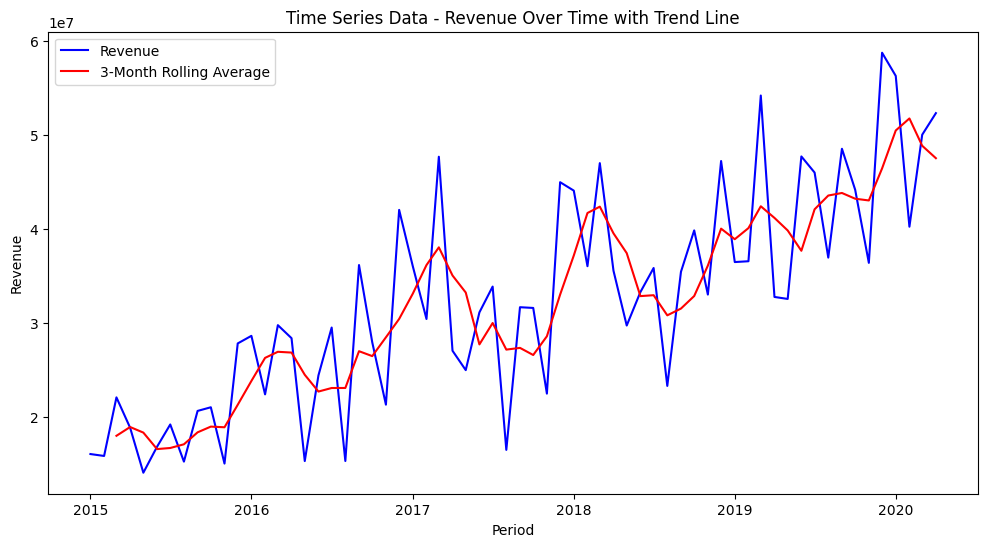

In [61]:
# Assuming your data is already loaded and 'Period' is set as the index
# Replace 'data' with the actual name of your DataFrame

# Visualize the time series data with a moving average trend line
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Revenue'], label='Revenue', color='blue')

# Calculate a 3-month rolling average for smoother visualization (adjust as needed)
rolling_average = data['Revenue'].rolling(window=3).mean()

# Plot the trend line
plt.plot(data.index, rolling_average, label='3-Month Rolling Average', color='red')

plt.xlabel('Period')
plt.ylabel('Revenue')
plt.title('Time Series Data - Revenue Over Time with Trend Line')
plt.legend()
plt.show()